### Individual exercise: housing data

Use the housing dataset and do Exploratory Data Analysis (EDA). Use all the tools you have learned so far (making summaries with groupby, select, filter, statistical summaries, and **especially** plotting.

Try to find patterns; find a story in the data!

As with the Titanic dataset, upload your notebook to Slack, or to GitHub and share the link.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("2022-10-04-housing-dataset-1-.csv")

In [ ]:
### Reflections
- How about feature engineering? It might be nice to look at price and condition's dual correlation from table to bar graph.


In [39]:
whole_water_df = df.groupby(["city"]).waterfront.value_counts().reset_index(name="count")

In [55]:
whole_water_df["price"] = df["price"]
whole_water_df["sqft_living"] = df["sqft_living"]
whole_water_df["condition"] = df["condition"]
whole_water_df["sqft_basement"] = df["sqft_basement"]
whole_water_df["view"] = df["view"]
round(whole_water_df.corr(method="pearson"),2)

,waterfront,count,price,sqft_living,condition,sqft_basement,view
waterfront,1.00,-0.20,-0.27,-0.20,0.01,0.09,-0.17
count,-0.20,1.00,0.04,0.04,0.16,-0.02,0.03
price,-0.27,0.04,1.00,0.58,0.33,0.20,0.57
sqft_living,-0.20,0.04,0.58,1.00,0.04,0.36,0.32
condition,0.01,0.16,0.33,0.04,1.00,0.44,0.26
sqft_basement,0.09,-0.02,0.20,0.36,0.44,1.00,0.01
view,-0.17,0.03,0.57,0.32,0.26,0.01,1.00


In [113]:
whole_water_df[["price","sqft_living"]].describe()

,price,sqft_living
count,5.700000e+01,57.000000
mean,5.384693e+05,2050.701754
std,3.310391e+05,714.419994
min,2.350000e+05,800.000000
25%,3.650000e+05,1520.000000
50%,4.525000e+05,1940.000000
75%,6.250000e+05,2710.000000
max,2.384000e+06,3650.000000


In [114]:
df[["price","sqft_living"]].describe()

,price,sqft_living
count,4.600000e+03,4600.000000
mean,5.519630e+05,2139.346957
std,5.638347e+05,963.206916
min,0.000000e+00,370.000000
25%,3.228750e+05,1460.000000
50%,4.609435e+05,1980.000000
75%,6.549625e+05,2620.000000
max,2.659000e+07,13540.000000


In [108]:
sns.set_palette("crest")

<AxesSubplot:xlabel='waterfront', ylabel='price'>

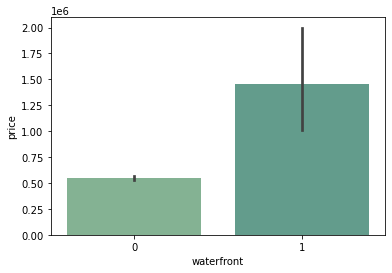

In [90]:
sns.barplot(data=df, x="waterfront", y="price")

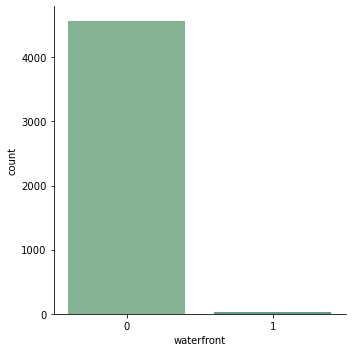

In [91]:
sns.catplot(x="waterfront", kind= "count", data = df)

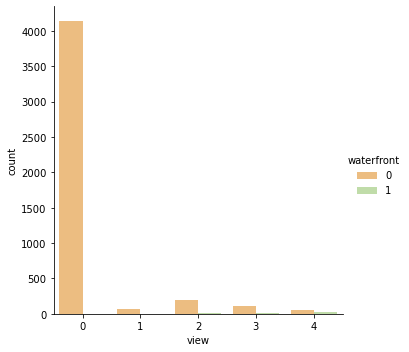

In [105]:
# I would like a percentage of this.
sns.catplot(data = df, kind="count", x="view", hue = "waterfront", palette = "Spectral")
# Did not find data dictionary. My guess is view is quality of views or number of views.
# From the data dictionaries viewed, that seems to be right.

In [93]:
# .waterfront for groupby works better
# In value counts, the the series and the third column do not have a name.
df.groupby(["city"]).waterfront.value_counts()

city                 waterfront
Algona               0                5
Auburn               0              176
Beaux Arts Village   0                1
Bellevue             0              284
                     1                2
Black Diamond        0                9
Bothell              0               33
Burien               0               71
                     1                3
Carnation            0               22
Clyde Hill           0               11
Covington            0               43
Des Moines           0               56
                     1                2
Duvall               0               42
Enumclaw             0               28
Fall City            0               11
Federal Way          0              147
                     1                1
Inglewood-Finn Hill  0                1
Issaquah             0              186
                     1                1
Kenmore              0               66
Kent                 0              185
Kirkland

In [94]:
# When making the data into a dataframe with reset index, the third column needs a name. 
# Python will try to name it waterfront which will cause an error of using the same name for two columns. 
df.groupby(["city"]).waterfront.value_counts().reset_index(name="count")

,city,waterfront,count
0,Algona,0,5
1,Auburn,0,176
2,Beaux Arts Village,0,1
3,Bellevue,0,284
4,Bellevue,1,2
5,Black Diamond,0,9
6,Bothell,0,33
7,Burien,0,71
8,Burien,1,3
9,Carnation,0,22


In [95]:
water_df = df.groupby(["city"]).waterfront.value_counts().reset_index(name="count")

In [96]:
# Putting percentage column
water_df["percentage_waterfront"] = round(water_df["waterfront"] / water_df["count"] * 100, 2)

In [97]:
# Way of filtering for cities of houses with views of water
# with a variable I did not use.
water_house = water_df.loc[water_df["waterfront"] == 1]
# water_house

In [98]:
# Percentage of waterfront by city
water_df["percentage_waterfront"] = round(water_df["waterfront"] / water_df["count"] * 100, 2)
# water_df

In [99]:
# Number of houses sold, population density?, and waterfront
# by count of houses sold.
# It would be nice to exclude cities not by water.
water_df.sort_values(["count"])

,city,waterfront,count,percentage_waterfront
18,Federal Way,1,1,100.00
51,Snoqualmie Pass,0,1,0.00
2,Beaux Arts Village,0,1,0.00
21,Issaquah,1,1,100.00
25,Kirkland,1,1,100.00
42,Renton,1,1,100.00
34,Normandy Park,1,1,100.00
19,Inglewood-Finn Hill,0,1,0.00
13,Des Moines,1,2,50.00
31,Milton,0,2,0.00


<AxesSubplot:xlabel='yr_built', ylabel='Count'>

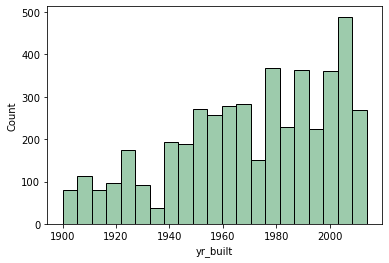

In [100]:
# Are people less able to build houses with views of water as space gets smaller?
sns.histplot(data=df, x="yr_built")

In [101]:
water_df["yr_built"] = df["yr_built"]
# water_df

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

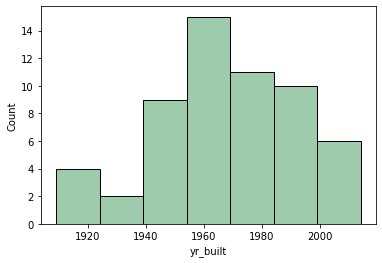

In [102]:
sns.histplot(data=water_df, x="yr_built")